In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

import sys
import os
sys.path.append('/Users/sonnguyen/Dropbox/My Mac (Son’s MacBook Air)/Documents/1. Data Analytics/CoderSchool/FinalProject/scripts/')
import data_cleaning

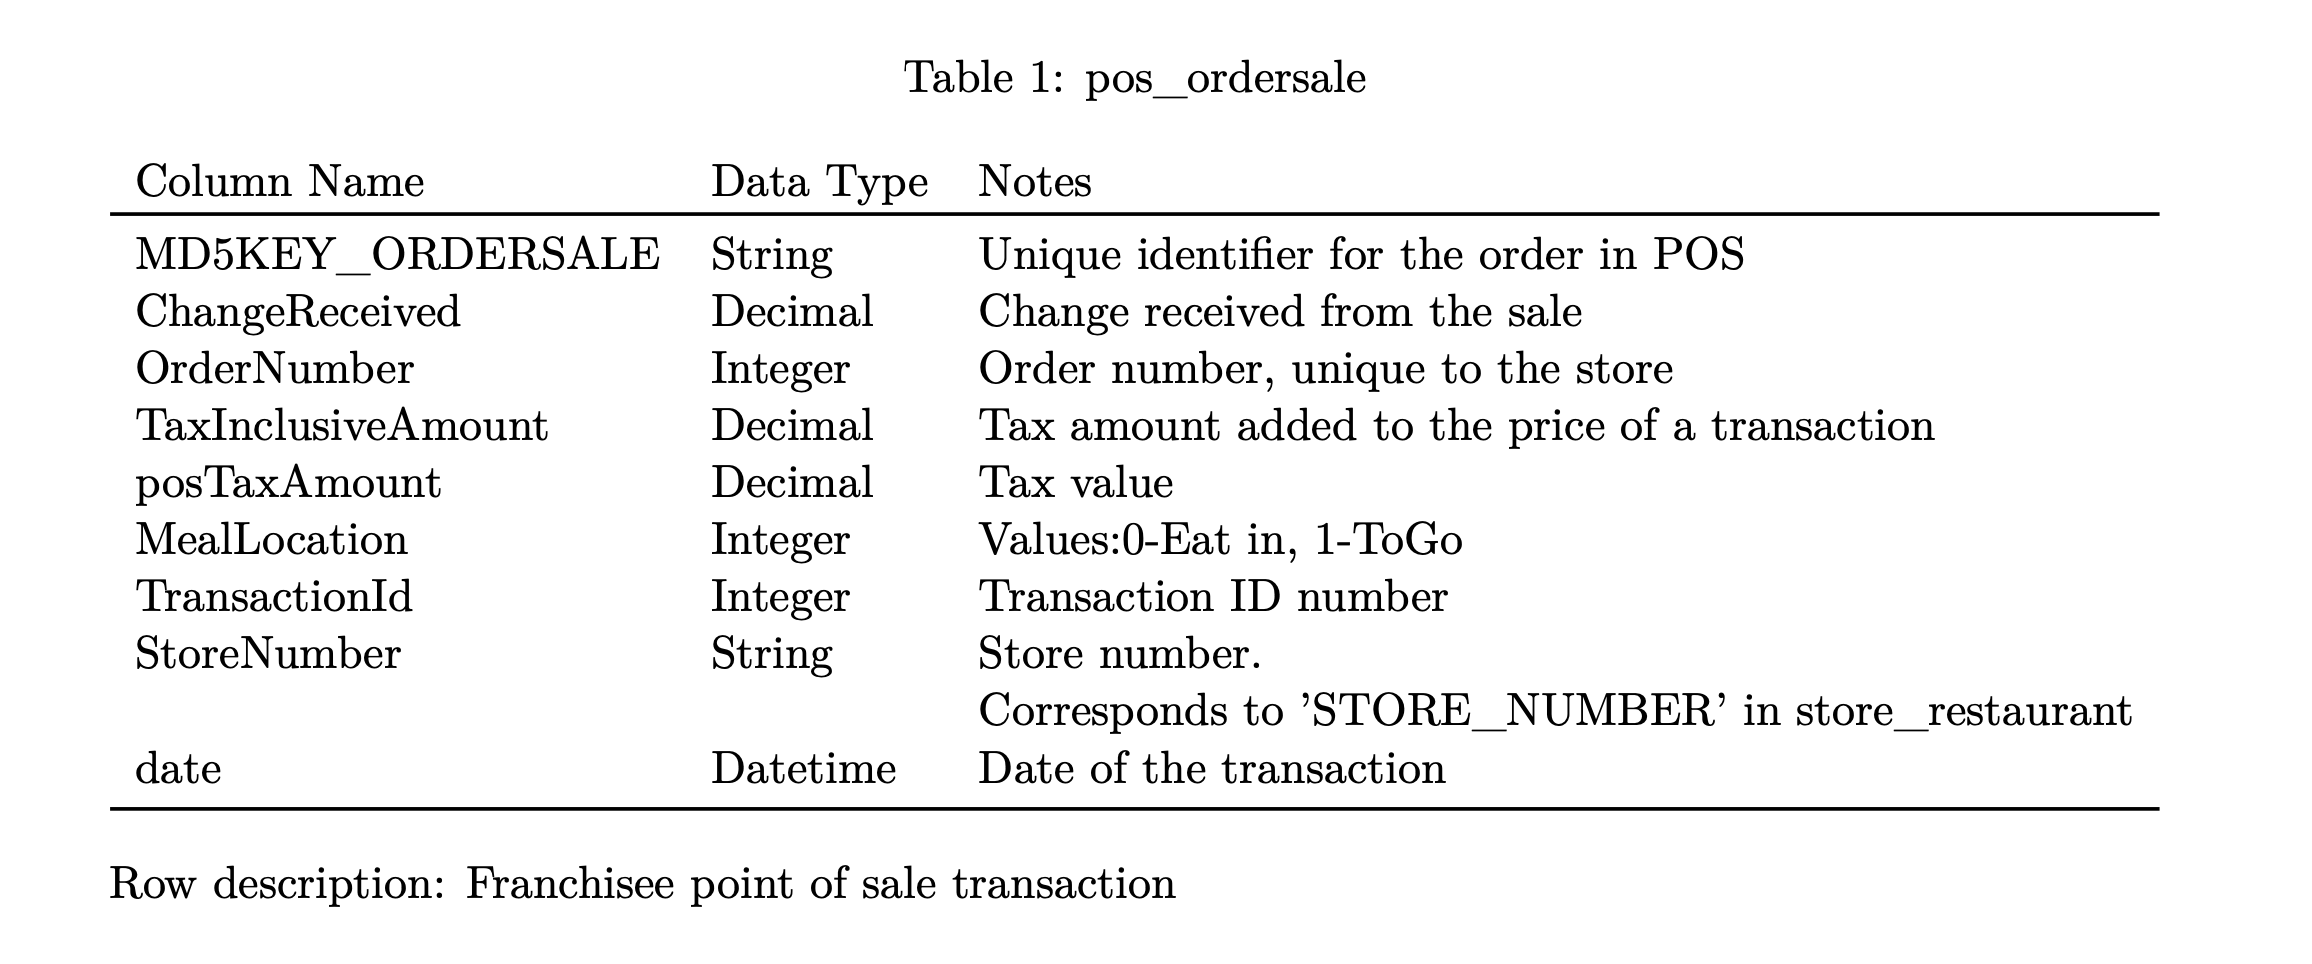

In [3]:
df = pd.read_csv('/Users/sonnguyen/Dropbox/My Mac (Son’s MacBook Air)/Documents/1. Data Analytics/CoderSchool/FinalProject/data/raw/pos_ordersale.csv')

In [4]:
df.head()

,MD5KEY_ORDERSALE,ChangeReceived,OrderNumber,TaxInclusiveAmount,TaxAmount,MealLocation,TransactionId,StoreNumber,date
0,00BCB738A1F814DB960C25012E9913DF,0.00,67,0,0.56,0,67,46673,15-03-05
1,03438C257BC2DD0037F35EC8BFC0C8E2,3.46,39,0,0.54,0,39,12631,15-03-05
2,04AEF56CF3130AC1EFAD41C470F5245D,0.00,81,0,0.69,0,79,46673,15-03-05
3,04BBFAD4E73C30EE2EC3B4E52509637C,0.00,159,0,1.16,0,159,12631,15-03-05
4,061AE382DC127057E8ADBBF869CFB361,0.00,51,0,0.00,0,51,12631,15-03-05


# 1. Kiểm tra và xử lý kiểu dữ liệu

## Kiểm tra

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43228 entries, 0 to 43227
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MD5KEY_ORDERSALE    43228 non-null  object 
 1   ChangeReceived      43228 non-null  float64
 2   OrderNumber         43228 non-null  int64  
 3   TaxInclusiveAmount  43228 non-null  int64  
 4   TaxAmount           43228 non-null  float64
 5   MealLocation        43228 non-null  int64  
 6   TransactionId       43228 non-null  int64  
 7   StoreNumber         43228 non-null  int64  
 8   date                43228 non-null  object 
dtypes: float64(2), int64(5), object(2)
memory usage: 3.0+ MB


## Xử lý

In [6]:
df['date'] = pd.to_datetime(df['date'], format="%y-%m-%d")

In [7]:
df.head()

,MD5KEY_ORDERSALE,ChangeReceived,OrderNumber,TaxInclusiveAmount,TaxAmount,MealLocation,TransactionId,StoreNumber,date
0,00BCB738A1F814DB960C25012E9913DF,0.00,67,0,0.56,0,67,46673,2015-03-05
1,03438C257BC2DD0037F35EC8BFC0C8E2,3.46,39,0,0.54,0,39,12631,2015-03-05
2,04AEF56CF3130AC1EFAD41C470F5245D,0.00,81,0,0.69,0,79,46673,2015-03-05
3,04BBFAD4E73C30EE2EC3B4E52509637C,0.00,159,0,1.16,0,159,12631,2015-03-05
4,061AE382DC127057E8ADBBF869CFB361,0.00,51,0,0.00,0,51,12631,2015-03-05


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43228 entries, 0 to 43227
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   MD5KEY_ORDERSALE    43228 non-null  object        
 1   ChangeReceived      43228 non-null  float64       
 2   OrderNumber         43228 non-null  int64         
 3   TaxInclusiveAmount  43228 non-null  int64         
 4   TaxAmount           43228 non-null  float64       
 5   MealLocation        43228 non-null  int64         
 6   TransactionId       43228 non-null  int64         
 7   StoreNumber         43228 non-null  int64         
 8   date                43228 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(5), object(1)
memory usage: 3.0+ MB


# 2. Kiểm tra và xử lý khoảng trắng

## Kiểm tra

In [18]:
df.select_dtypes(include="object").columns

Index(['MD5KEY_ORDERSALE'], dtype='object')

In [19]:
df['MD5KEY_ORDERSALE'].unique()

array(['00BCB738A1F814DB960C25012E9913DF',
       '03438C257BC2DD0037F35EC8BFC0C8E2',
       '04AEF56CF3130AC1EFAD41C470F5245D', ...,
       'FD23743074BCCB6E0847269D09F458AE',
       'FD570797AC0A9AFC3953A30EC5355829',
       'FF181C8AF4B9B9BD8912B2926464EB08'], dtype=object)

## Xử lý

# 3. Kiểm tra giá trị thiếu

## Kiểm tra

In [20]:
df.isna().sum()

MD5KEY_ORDERSALE      0
ChangeReceived        0
OrderNumber           0
TaxInclusiveAmount    0
TaxAmount             0
MealLocation          0
TransactionId         0
StoreNumber           0
date                  0
dtype: int64

# 4. Kiểm tra trùng lặp

## Kiểm tra

In [22]:
df.duplicated().sum()

0

# 5. Kiểm tra giá trị ngoại lai

## 5.1 Kiểm tra tổng quan

In [23]:
df.describe()

,ChangeReceived,OrderNumber,TaxInclusiveAmount,TaxAmount,MealLocation,TransactionId,StoreNumber,date
count,43228.000000,43228.000000,43228.0,43228.000000,43228.000000,43228.000000,43228.000000,43228
mean,2.675223,6044.521144,0.0,0.562844,0.180693,6044.686083,16982.950287,2015-04-26 20:16:06.706764288
min,0.000000,1.000000,0.0,0.000000,0.000000,1.000000,4904.000000,2015-03-05 00:00:00
25%,0.000000,2750.750000,0.0,0.210000,0.000000,2750.750000,4904.000000,2015-04-03 00:00:00
50%,0.000000,5462.000000,0.0,0.540000,0.000000,5462.000000,12631.000000,2015-04-27 00:00:00
75%,2.092500,8709.250000,0.0,0.740000,0.000000,8710.000000,20974.000000,2015-05-20 00:00:00
max,727.680000,16159.000000,0.0,43.230000,1.000000,16159.000000,46673.000000,2015-06-15 00:00:00
std,8.165288,4054.109577,0.0,0.539585,0.384768,4054.210729,14459.933253,NaN


## 5.2 Kiểm tra và xử lý cột TaxInclusiveAmount

### 5.2.1 Kiểm tra

In [24]:
df['TaxInclusiveAmount'].unique()

array([0])

### 5.2.2 Xử lý
Xoá cột TaxInclusiveAmount do các giá trị đều bằng 0, không có ý nghĩa trong việc phân tích

In [26]:
df = df.drop(columns="TaxInclusiveAmount")

In [27]:
df.columns

Index(['MD5KEY_ORDERSALE', 'ChangeReceived', 'OrderNumber', 'TaxAmount',
       'MealLocation', 'TransactionId', 'StoreNumber', 'date'],
      dtype='object')

## 5.3 Kiểm tra giá trị ngoại lại TaxAmount

In [28]:
df['TaxAmount'].describe()

count    43228.000000
mean         0.562844
std          0.539585
min          0.000000
25%          0.210000
50%          0.540000
75%          0.740000
max         43.230000
Name: TaxAmount, dtype: float64

In [31]:
# Kiểm tra số lượng giá trị duy nhất
df['TaxAmount'].nunique()

360

In [33]:
# Tính Q1 (25th percentile) và Q3 (75th percentile)
Q1 = df['TaxAmount'].quantile(0.25)
Q3 = df['TaxAmount'].quantile(0.75)

# Tính IQR
IQR = Q3 - Q1

# Xác định giới hạn dưới và trên
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Xác định giá trị ngoại lai
outliers = df[(df['TaxAmount'] < lower_bound) | (df['TaxAmount'] > upper_bound)]

print("Số hàng df:", df.shape[0])
print("Số hàng outliers:", outliers.shape[0])
print("% outliers:", outliers.shape[0]/df.shape[0]*100)

print(lower_bound)
print(upper_bound)

Số hàng df: 43228
Số hàng outliers: 1366
% outliers: 3.1599888960858706
-0.5850000000000001
1.5350000000000001


## 5.4 Kiểm tra các món ăn trong các khoảng phần tư

### 5.4.1 Giá trị phần tư thứ nhất

In [35]:
df_25 = df[df['TaxAmount'] <= Q1]
df_25

,MD5KEY_ORDERSALE,ChangeReceived,OrderNumber,TaxAmount,MealLocation,TransactionId,StoreNumber,date
4,061AE382DC127057E8ADBBF869CFB361,0.00,51,0.00,0,51,12631,2015-03-05
6,0683B0A81C854E7BBE3B2CFD3D75D62C,0.00,40,0.00,0,40,12631,2015-03-05
12,0BFDE2966D2892520F5680041D4AEE65,0.00,10,0.00,0,10,12631,2015-03-05
13,0D68791B2221340C81FBF66CA58438A8,0.00,90,0.00,0,90,12631,2015-03-05
15,0F3808BC4B349D91ED1C60F1ACD070D7,0.25,44,0.00,1,44,46673,2015-03-05
...,...,...,...,...,...,...,...,...
43217,FA5813D76F93E1D5D2BB1E6AD4A0B80A,13.65,7188,0.15,1,7188,46673,2015-06-15
43222,FB93EDDE48CC8051EFD5362A050FF33B,0.00,8059,0.00,0,8059,20974,2015-06-15
43225,FD23743074BCCB6E0847269D09F458AE,0.00,16014,0.00,1,16014,4904,2015-06-15
43226,FD570797AC0A9AFC3953A30EC5355829,0.00,7149,0.00,1,7149,46673,2015-06-15


In [36]:
df_75 = df[df['TaxAmount'] > Q3]
df_75

,MD5KEY_ORDERSALE,ChangeReceived,OrderNumber,TaxAmount,MealLocation,TransactionId,StoreNumber,date
3,04BBFAD4E73C30EE2EC3B4E52509637C,0.00,159,1.16,0,159,12631,2015-03-05
7,072D3B76BE58E4553A373AF3206D2CA5,0.00,90,0.90,0,87,46673,2015-03-05
8,07436936F3929B875D3128106550394F,0.00,19,0.79,0,19,46673,2015-03-05
9,09F16AC6C629944163B1E60A4CF104F0,0.00,7,1.16,0,7,12631,2015-03-05
18,136B81E3F2A1960BF07BCD69875FE3E3,0.00,8,0.89,0,8,46673,2015-03-05
...,...,...,...,...,...,...,...,...
43205,F51A3B76568DCEF93341952251B702C9,0.00,8066,0.79,0,8066,20974,2015-06-15
43209,F76EC107396D301F023CE2BBA36DBEF7,0.00,7183,0.81,0,7183,46673,2015-06-15
43214,F9A44965F29D6B1FCD128377A6217B93,9.65,8024,0.80,0,8024,20974,2015-06-15
43216,F9EF244FA4CBAA5F67547E552600BEA2,0.00,16102,0.84,0,16102,4904,2015-06-15


In [47]:
df_TaxAmount = df.groupby('TaxAmount').agg(count=('TaxAmount', 'count')).sort_values(by='count', ascending=False).reset_index()
df_TaxAmount

,TaxAmount,count
0,0.00,7309
1,0.54,2363
2,0.57,1776
3,0.47,1453
4,0.51,959
...,...,...
355,3.13,1
356,2.46,1
357,3.05,1
358,3.03,1


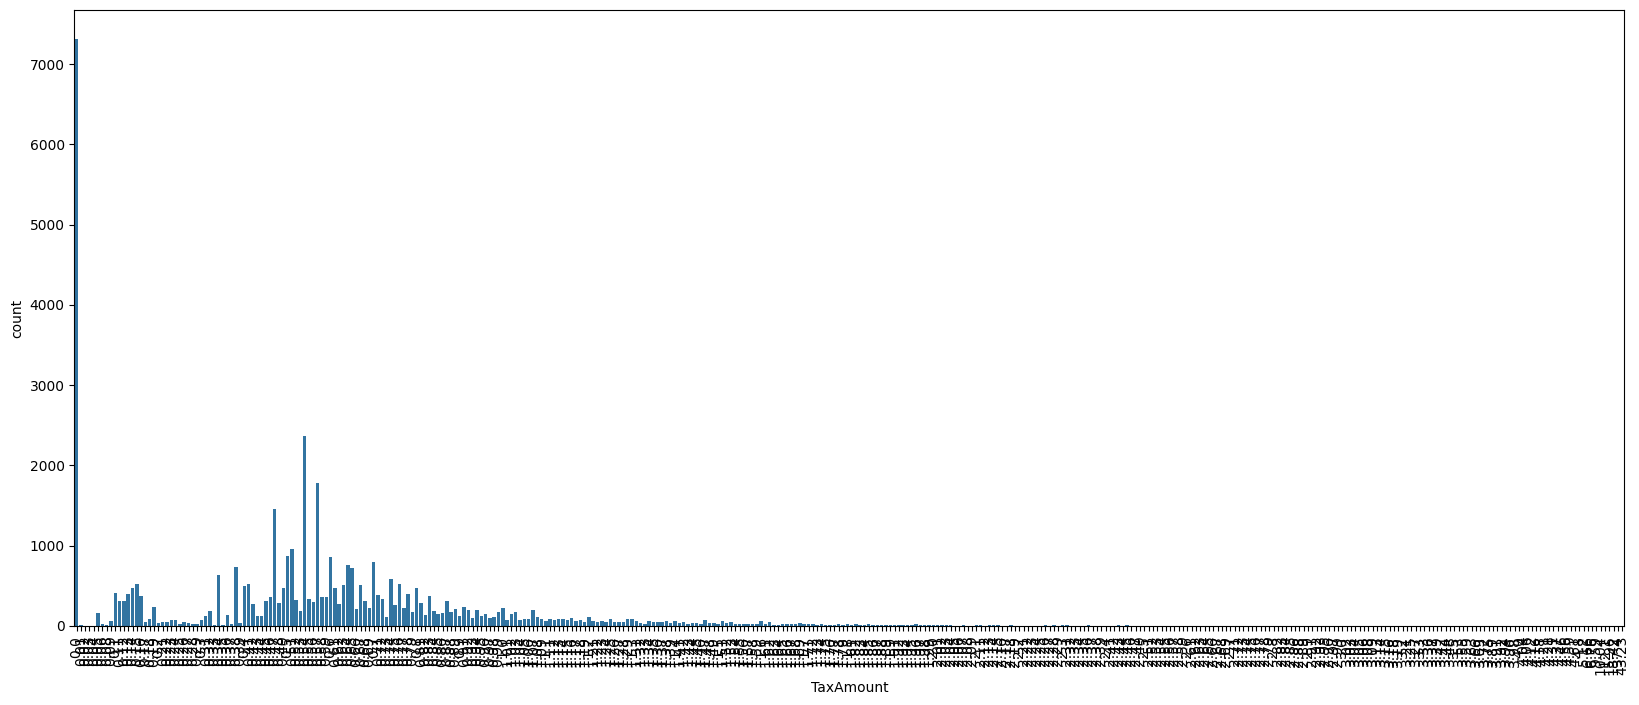

In [50]:
plt.figure(figsize=(20, 8))
sns.barplot(df_TaxAmount, x='TaxAmount', y='count')

plt.xticks(rotation=90, ha='center')
plt.show()

# Kiểm tra số lượng item trong cùng một order

In [52]:
# Import menuitem - file sau khi xử lý
df_menuitem = pd.read_csv("/Users/sonnguyen/Dropbox/My Mac (Son’s MacBook Air)/Documents/1. Data Analytics/CoderSchool/FinalProject/data/processed/20240720/menuitem_20240720.csv")

In [53]:
df_menuitem.columns

Index(['MD5KEY_MENUITEM', 'MD5KEY_ORDERSALE', 'CategoryDescription',
       'DepartmentDescription', 'Description', 'StoreNumber',
       'TaxInclusiveAmount', 'TaxAmount', 'AdjustedPrice', 'DiscountAmount',
       'Price', 'Quantity', 'PLU', 'Id', 'date', 'SalesAmount', 'day_of_week'],
      dtype='object')

In [54]:
df.columns

Index(['MD5KEY_ORDERSALE', 'ChangeReceived', 'OrderNumber', 'TaxAmount',
       'MealLocation', 'TransactionId', 'StoreNumber', 'date'],
      dtype='object')